In [1]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score,precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import pickle

#log_reg = pd.read_csv('outputs/lr_predictions.csv')
# y_test = np.load('outputs/y_test.npy')
# X_train = pickle.load(open('outputs/X_train_tfidf.pickle', "rb"))
# y_train = np.load('outputs/y_train.npy')
# x_test = pickle.load(open('outputs/X_test_tfidf.pickle', "rb"))

#read combined clean into df dataframe, then split data into train,test
df= pd.read_csv('outputs/clean_combined.csv')
df = df.dropna(subset=['text_processed'])
text_train,text_test,y_train,y_test = train_test_split(df['text_processed'].values,df['label'].values,test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(text_train)
X_test = vectorizer.transform(text_test)

lr_clf = LogisticRegression(random_state=42)
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)


#fig, ax = plt.subplots(figsize=(10,10))
#cm_display.plot(ax=ax)


Text(0, 0.5, 'True label')

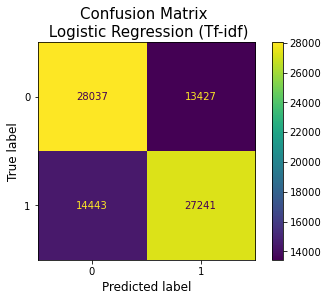

In [49]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=[0, 1]).plot()

plt.title('Confusion Matrix \n Logistic Regression (Tf-idf)', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)



In [26]:
#!pip install scikit-plot

#from scikitplot.classifiers import plot_precision_recall_curve

#clf = LogisticRegression()
#plot_precision_recall_curve(y_test, y_pred)
#plt.show()

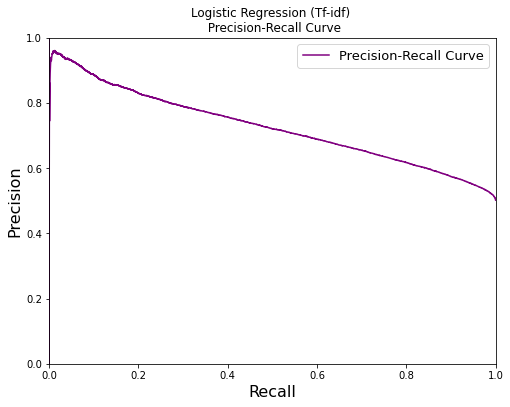

In [34]:
#Precision recall curve
y_score= lr_clf.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

plt.figure(figsize=(8,6))
plt.xlim([0.00, 1.0])
plt.ylim([0.00, 1.0])
plt.plot(recall, precision, label='Precision-Recall Curve', color='purple')
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.title('Logistic Regression (Tf-idf) \n Precision-Recall Curve')
plt.legend(fontsize=13)

plt.show()


In [ ]:
#from sklearn.metrics import plot_precision_recall_curve
#
#plot_precision_recall_curve(lr_clf, X_test, y_test)

#plt.title("Precision-Recall curve"); # Add a title for clarity

#plt.show()
